In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from astropy.time import Time
from astropy.visualization import time_support, astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
time_support()  

<astropy.visualization.time.time_support.<locals>.MplTimeConverter at 0x7fa577f87d30>

In [2]:
start_time='2020-02-07T20:00'
star='pollux'

In [11]:
data= np.load(f'plots/FoV_test_m_cut_3_{star}_{start_time}.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]

In [12]:
stars = list(data.keys())
#sites = list(data[events[0]].keys())
stars


['pollux']

In [13]:
data[star].keys()

dict_keys(['ra_dec', 0.0022])

In [14]:
divergence=[0.0022]#,0.0043,0.008,0.01135,0.01453]


In [15]:
for name in stars:
    for div in divergence:
        for i in range(len(data[name][div]['obstime'])):
            data[name][div]['obstime']=Time(data[name][div]['obstime'], scale='utc', format ='isot')

In [16]:
for name in stars:
    
    if name==star:
        for i in range(len(data[name][divergence[0]]['hFoV_track'])):
            print(data[name][divergence[0]]['obstime'][i])
            print(data[name][divergence[0]]['alt'][i])
            

2020-02-07T20:00:00.000
40.24538945396851
2020-02-07T20:10:00.000
42.38403578555153
2020-02-07T20:20:00.000
44.529181985372674
2020-02-07T20:30:00.000
46.68039668345038
2020-02-07T21:00:00.000
53.166421283356705
2020-02-07T22:00:00.000
66.25143419023475
2020-02-07T23:00:00.000
79.42357187648011
2020-02-08T00:00:00.000
87.20479225826577
2020-02-08T01:00:00.000
74.07815207390361
2020-02-08T02:00:00.000
60.9312896242467
2020-02-08T03:00:00.000
47.903363718030114
2020-02-08T04:00:00.000
35.07270831478623


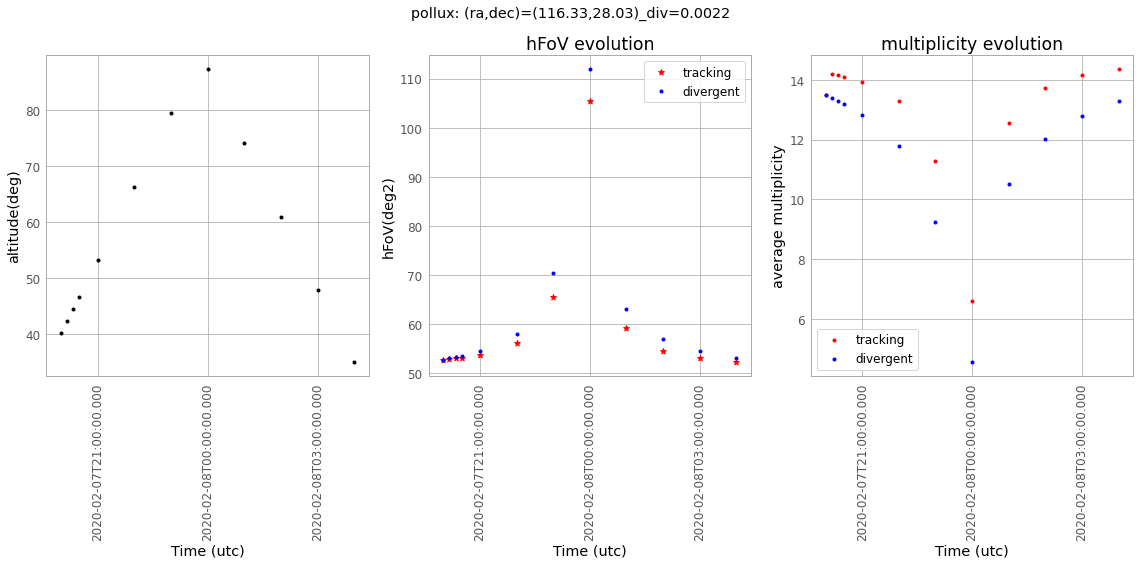

In [17]:
for name in stars:
    
    if name==star:
        div==divergence[0]
        fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=3)
        fig.suptitle(f"{name}: (ra,dec)=({round(data[name]['ra_dec'][0],2)},{round(data[name]['ra_dec'][1],2)})_div={div}")

        for i in range(len(data[name][divergence[0]]['hFoV_track'])):
            
            #time=Time(data[name][div]['obstime'][i],scale='utc',format='isot')
            
            #if data[name][divergence[0]]['obstime'][i]>=Time('2020-02-08T00:00',scale='utc', format='isot'):
                #print(data[name][divergence[0]]['obstime'][i])
                ax[0].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['alt'][i],marker='.',color='black')
                ax[0].set_ylabel('altitude(deg)')
                ax[0].xaxis.set_tick_params(rotation=90)
                
                
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_track'][i],marker='*',color='r',label='traking_hFoV')
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[1].set_title('hFoV evolution')
                ax[1].set_ylabel('hFoV(deg2)')
                ax[1].xaxis.set_tick_params(rotation=90)
                ax[1].legend(['tracking','divergent'])
                
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_track'][i],marker='.',color='r',label='traking_hFoV')
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[2].set_title('multiplicity evolution')
                ax[2].set_ylabel('average multiplicity')
                ax[2].xaxis.set_tick_params(rotation=90)
                ax[2].legend(['tracking','divergent'])
        #ax[2].set_xticks(data[name][divergence[0]]['obstime'])
        #ax[2].set_xticklabels(data[name][divergence[0]]['obstime'], rotation = 45)
        fig.tight_layout()

        
plt.show();

In [18]:
star

'pollux'

/home/irene/.local/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


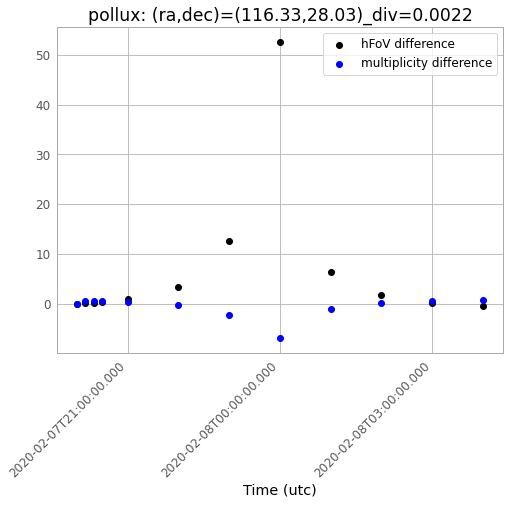

In [19]:
#star='pollux'
for i in range(len(data[star][divergence[0]]['hFoV_track'])):            
    #if data[star][divergence[0]]['obstime'][i]>=Time('2020-02-08T04:00',scale='utc', format='isot'):
    plt.scatter(data[star][divergence[0]]['obstime'][i],data[star][divergence[0]]['hFoV_track'][i]-data[star][divergence[0]]['hFoV_track'][0] ,color='black')
    plt.scatter(data[star][divergence[0]]['obstime'][i], data[star][divergence[0]]['m_ave_track'][i]-data[star][divergence[0]]['m_ave_track'][0],color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{star}: (ra,dec)=({round(data[star]['ra_dec'][0],2)},{round(data[star]['ra_dec'][1],2)})_div={divergence[0]}")
    plt.legend(['hFoV difference','multiplicity difference'])

In [11]:
for fiv in divergence:
    data[star][div]['hfov_diff']=np.asarray(data[star][div]['hfov_diff'])
data[star][divergence[4]]['hfov_diff']

array([32.3399316 , 34.47945649, 36.57041391, 42.28099229, 48.06929638,
       43.44988268, 34.10781631, 25.0963674 , 16.35822609])

In [12]:
for div in divergence:
    data[star][div]['m_ave_diff']=np.asarray(data[star][div]['m_ave_diff'])
np.max(np.abs(data[star][divergence[4]]['hfov_diff']))

48.06929638150386

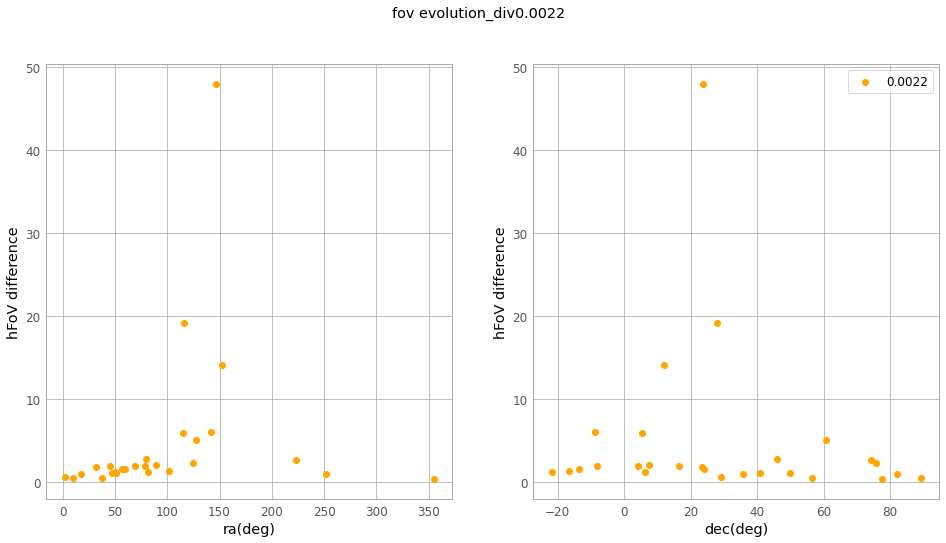

In [13]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}")

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        ax[0].scatter(data[name]['ra_dec'][0],np.max(np.abs(data[name][div]['hfov_diff'])),color=color[2])
        ax[1].scatter(data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['hfov_diff'])),color=color[2])
    except ValueError:  #raised if `y` is empty.
        pass
    
    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

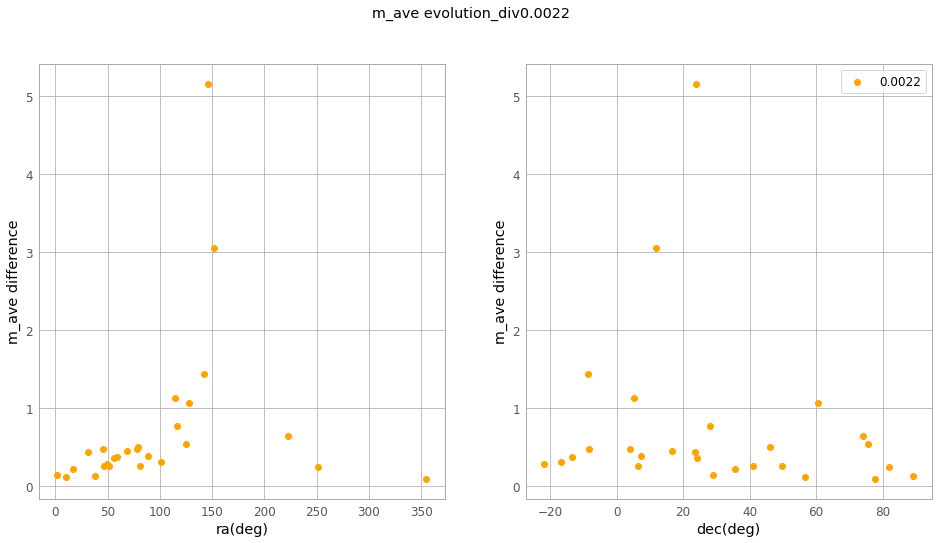

In [14]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"m_ave evolution_div{divergence[0]}")

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        ax[0].scatter(data[name]['ra_dec'][0],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
        ax[1].scatter(data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
    except ValueError:  #raised if `y` is empty.
        pass
    
    ax[0].set_ylabel('m_ave difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('m_ave difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

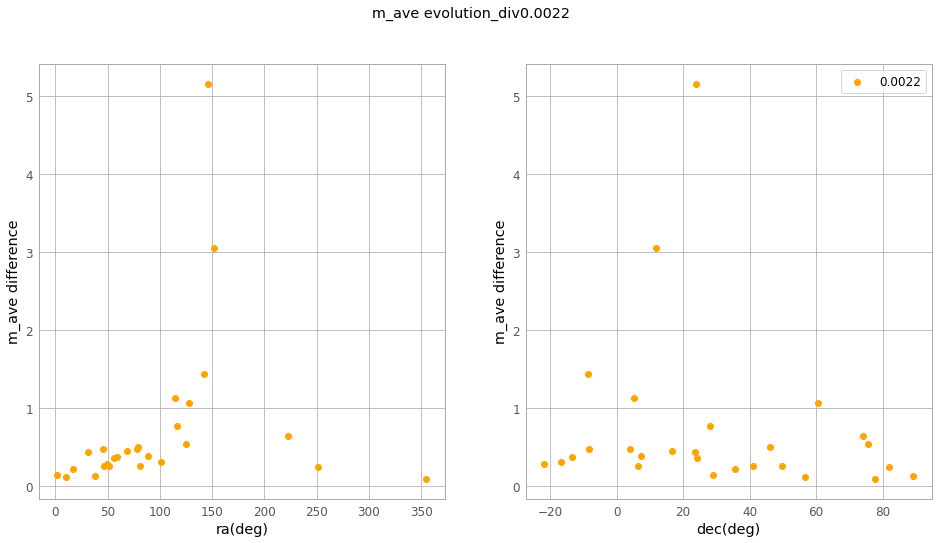

In [15]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"m_ave evolution_div{divergence[0]}")

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        ax[0].scatter(data[name]['ra_dec'][0],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
        ax[1].scatter(data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
    except ValueError:  #raised if `y` is empty.
        pass
    
    ax[0].set_ylabel('m_ave difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('m_ave difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

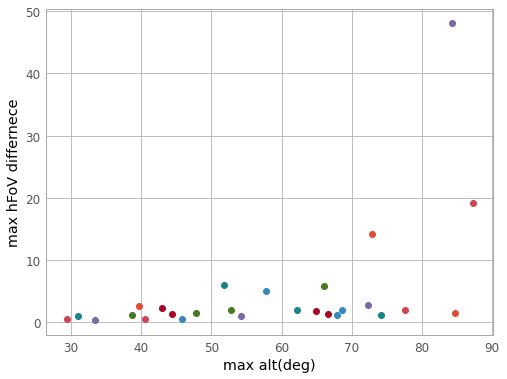

In [16]:
for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        plt.scatter(np.max(data[name][div]['alt']),np.max(np.abs(data[name][div]['hfov_diff'])))
        plt.xlabel('max alt(deg)')
        plt.ylabel('max hFoV differnece')
        
    except ValueError:  #raised if `y` is empty.
        pass
    

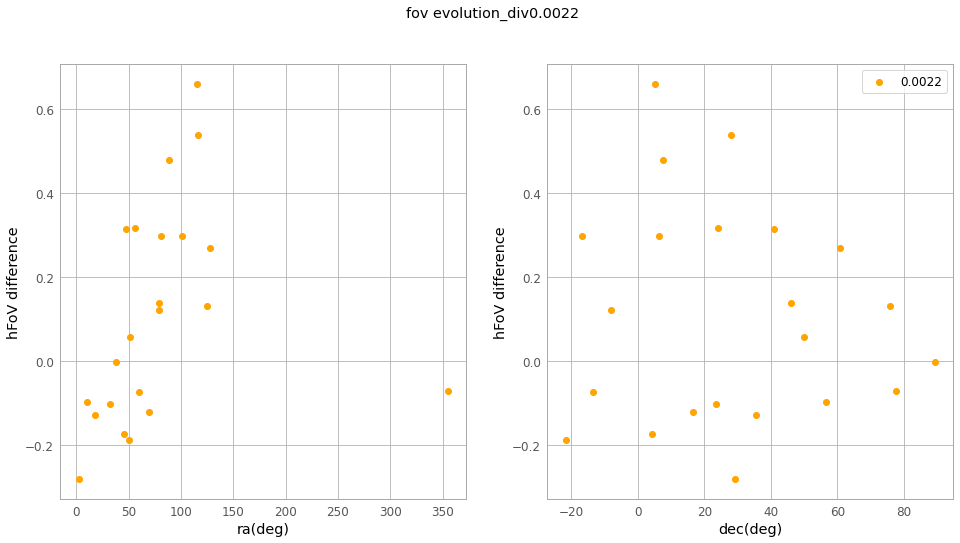

In [17]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}")

for name in stars:
    div=divergence[0]
    for i in range(len(data[name][div]['obstime'])):
    #for j,div in enumerate(divergence):
   
        if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

            ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
            ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hfov_diff'][i],color=color[2])

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

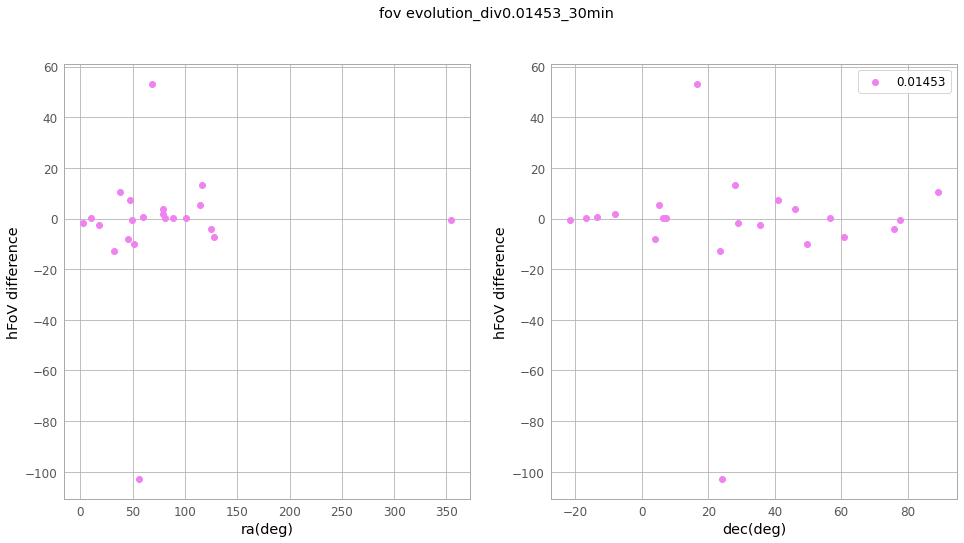

In [21]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_30min")

for name in stars:
    div=divergence[4]
    for i in range(len(data[name][div]['obstime'])):
    #for j,div in enumerate(divergence):
   
        if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

            ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')
            ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)
    #ax[0].legend()
    plt.legend([div])

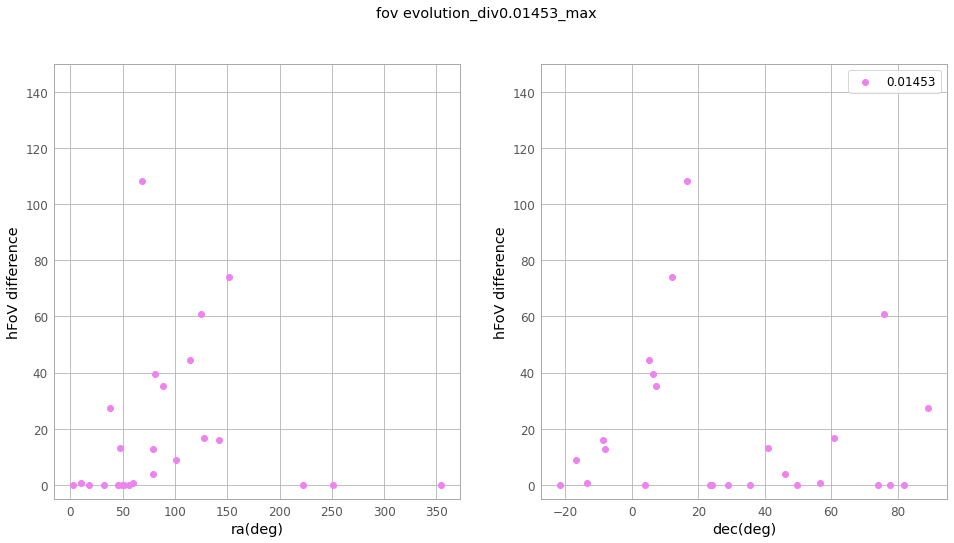

In [19]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_max")

for name in stars:
    div=divergence[4]
    
    #for j,div in enumerate(divergence):
    ax[0].scatter(data[name]['ra_dec'][0],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')
    ax[1].scatter(data[name]['ra_dec'][1],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    ax[0].set_ylim(-5,150)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    ax[1].set_ylim(-5,150)
    #plt.legend()
    plt.legend([div])

(array([58886.83333333, 58886.91666667, 58887.        , 58887.08333333]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

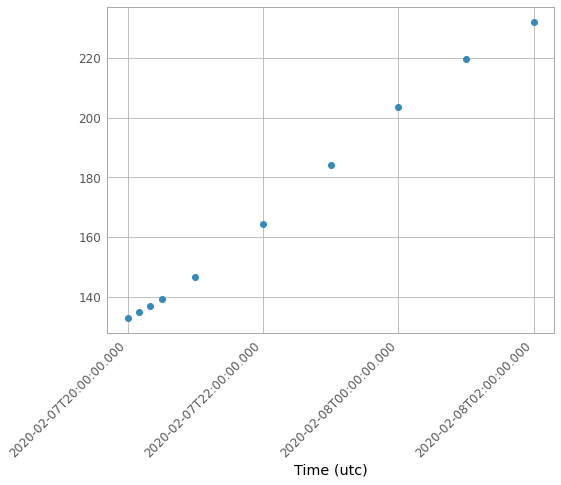

In [20]:
plt.scatter(data[star][divergence[0]]['obstime'],data[star][divergence[0]]['az'])
plt.xticks(rotation=45, ha='right')